In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import os
import distutils
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Dropout, Conv2DTranspose, UpSampling2D, Add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train=tfds.load('clic', split='train', shuffle_files=True)

Shuffling and writing examples to /root/tensorflow_datasets/clic/1.0.0.incomplete8AAPGH/clic-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/clic/1.0.0.incomplete8AAPGH/clic-validation.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/clic/1.0.0.incomplete8AAPGH/clic-test.tfrecord


Dataset clic downloaded and prepared to /root/tensorflow_datasets/clic/1.0.0. Subsequent calls will reuse this data.


In [ ]:
test=tfds.load('clic', split='test', shuffle_files=True)

In [ ]:
validate=tfds.load('clic', split='validation', shuffle_files=True)

In [ ]:
print(train)
print(test)
print(validate)

<_OptionsDataset shapes: {image: (None, None, 3)}, types: {image: tf.uint8}>
<_OptionsDataset shapes: {image: (None, None, 3)}, types: {image: tf.uint8}>
<_OptionsDataset shapes: {image: (None, None, 3)}, types: {image: tf.uint8}>


#Resize data to 128x128x3

In [ ]:
train_temp = train.take(10000)

In [ ]:
train_data = []
train_data_sr = []
for example in train_temp:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  temp = np.array(example["image"])
  PIL_image = Image.fromarray(np.uint8(temp)).convert('RGB')
  im_trans = PIL_image.resize((128, 128))
  train_data.append(np.array(im_trans))
  #im_trans = PIL_image.resize((512, 512))
  #train_data_sr.append(np.array(im_trans))


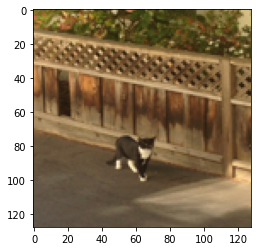

In [ ]:
plt.imshow(train_data[0])

In [ ]:
#plt.imshow(train_data_sr[0])

In [ ]:
test_temp = test.take(1000)

In [ ]:
test_data = []
test_data_sr = []
for example in test_temp:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  temp = np.array(example["image"])
  PIL_image = Image.fromarray(np.uint8(temp)).convert('RGB')
  im_trans = PIL_image.resize((128, 128))
  test_data.append(np.array(im_trans)) 
  #im_trans = PIL_image.resize((512, 512))
  #test_data_sr.append(np.array(im_trans))

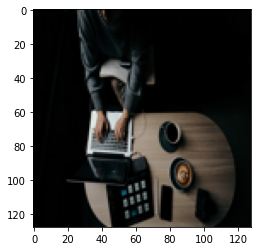

In [ ]:
plt.imshow(test_data[0])

In [ ]:
validate_temp = validate.take(1000)

In [ ]:
validation_data = []
validation_data_sr = []
for example in validate_temp:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  temp = np.array(example["image"])
  PIL_image = Image.fromarray(np.uint8(temp)).convert('RGB')
  im_trans = PIL_image.resize((128, 128))
  validation_data.append(np.array(im_trans))
  #im_trans = PIL_image.resize((512, 512))
  #validation_data_sr.append(np.array(im_trans))

In [ ]:
train_data_arr = np.zeros((1633, 128, 128, 3), dtype=np.float32)
test_data_arr = np.zeros((428, 128, 128, 3), dtype=np.float32)
validation_data_arr = np.zeros((102, 128, 128, 3), dtype=np.float32)

#train_data_sr_arr = np.zeros((1633, 512, 512, 3), dtype=np.float32)
#test_data_sr_arr = np.zeros((428, 512, 512, 3), dtype=np.float32)
#validation_data_sr_arr = np.zeros((102, 512, 512, 3), dtype=np.float32)

In [ ]:
#train_data_sr_arr = np.zeros((1633, 512, 512, 3), dtype=np.float32)
#train_data_arr = np.zeros((1633, 128, 128, 3), dtype=np.float32)

In [ ]:
for i in range(1633):
    train_data_arr[i] = train_data[i]/255.0
    #train_data_sr_arr[i] = train_data_sr[i]/255.0
    if i%100 == 0:
        print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600


In [ ]:
for i in range(428):
    test_data_arr[i] = test_data[i]/255.0
    #test_data_sr_arr[i] = test_data_sr[i]/255.0
    if i%100 == 0:
        print(i)

0
100
200
300
400


In [ ]:
for i in range(102):
    validation_data_arr[i] = validation_data[i]/255.0
    #validation_data_sr_arr[i] = validation_data_sr[i]/255.0
    if i%100 == 0:
        print(i)

0
100


In [ ]:
validation_data_sr_arr=0
train_data_sr_arr = 0

In [ ]:
validation_data =[]
test_data = []
train_data=[]
validation_data_sr =[]
test_data_sr = []
train_data_sr=[]

# comp-coder model

In [ ]:
def create_model():
  input_img = Input(shape=(128, 128, 3))

  a1 = tf.keras.layers.Conv2D(32, (3,3), strides=1, padding='same')(input_img)
  #a2 = tf.keras.layers.BatchNormalization()(a1)
  a3 = tf.keras.layers.Activation('relu') (a1)

  a4 = tf.keras.layers.Conv2D(64, (3,3), strides=2, padding='same')(a3)
  #a5 = tf.keras.layers.BatchNormalization()(a4)
  a6 = tf.keras.layers.Activation('relu')(a4)

  a7 = tf.keras.layers.Conv2D(128, (3,3), strides=1, padding='same') (a6)
  #a8 = tf.keras.layers.BatchNormalization() (a7)
  a9 = tf.keras.layers.Activation('relu')(a7)
  '''
  a10 = tf.keras.layers.Conv2D(128, (5,5), strides=2, padding='same', kernel_regularizer = regularizers.l1(10e-10)) (a9)
  a11 = tf.keras.layers.BatchNormalization()(a10)
  a12 = tf.keras.layers.Activation('sigmoid')(a11)

  a13 = tf.keras.layers.Conv2D(256, (5,5), strides=1, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a12)
  a14 = tf.keras.layers.BatchNormalization() (a13)
  a15 = tf.keras.layers.Activation('sigmoid')(a14)
  
  a16 = tf.keras.layers.Conv2D(256, (5,5), strides=1, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a9)
  #a17 = tf.keras.layers.BatchNormalization()(a16)
  a18 = tf.keras.layers.Activation('sigmoid')(a16)
  '''
  a19 = tf.keras.layers.Conv2D(128, (3,3), strides=1, padding='same')(a9)
  #a20 = tf.keras.layers.BatchNormalization()(a19)
  a21 = tf.keras.layers.Activation('relu')(a19)

  skip_0 = tf.keras.layers.Add()([a21, a9])

  a22 = tf.keras.layers.Conv2D(64, (3,3), strides=1, padding='same')(skip_0)
  #a23 = tf.keras.layers.BatchNormalization()(a22)
  a24 = tf.keras.layers.Activation('relu')(a22)
  '''
  a25 = tf.keras.layers.Conv2D(16, (3,3), strides=1, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a24)
  #a26 = tf.keras.layers.BatchNormalization()(a25)
  a27 = tf.keras.layers.Activation('relu')(a25)
  '''
#compressed version
  a28 = tf.keras.layers.Conv2D(3, (3,3),strides=1, padding='same')(a24)
  #a29 = tf.keras.layers.BatchNormalization()(a28)
  a30 = tf.keras.layers.Activation('relu')(a28)
################

  #Decoder
  a31 = tf.keras.layers.Conv2DTranspose(32, (3,3), strides=1, padding='same')(a30)
  #a32 = tf.keras.layers.BatchNormalization()(a31)
  a33 = tf.keras.layers.Activation('relu')(a31)
  '''
  a34 = tf.keras.layers.Conv2DTranspose(256, (3,3), strides=1, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a33)
  #a35 = tf.keras.layers.BatchNormalization()(a34)
  a36 = tf.keras.layers.Activation('sigmoid')(a34)  

  #a37 = tf.keras.layers.Add()([a36, a18])
  
  a38 = tf.keras.layers.Conv2DTranspose(256, (5,5), strides=2, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a36)
  a39 = tf.keras.layers.BatchNormalization()(a38)
  a40 = tf.keras.layers.Activation('sigmoid')(a39)

  a41 = tf.keras.layers.Conv2DTranspose(128, (5,5), strides=1, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a40)
  a42 = tf.keras.layers.BatchNormalization()(a41)
  a43 = tf.keras.layers.Activation('sigmoid')(a42)
  '''
  #a44 = tf.keras.layers.Add()([a43, a12])

  a45 = tf.keras.layers.Conv2DTranspose(128, (3,3), strides=2, padding='same')(a33)
  #a46 = tf.keras.layers.BatchNormalization()(a45)
  a47 = tf.keras.layers.Activation('relu')(a45)

  a48 = tf.keras.layers.Conv2DTranspose(64, (3,3), strides=1, padding='same')(a47)
  #a49 = tf.keras.layers.BatchNormalization()(a48)
  a50 = tf.keras.layers.Activation('relu')(a48)

  #a51 = tf.keras.layers.Add()([a50, a6])
  '''
  a52 = tf.keras.layers.Conv2DTranspose(64, (5,5), strides=1, padding='same', kernel_regularizer = regularizers.l1(10e-10))(a50)
  #a53 = tf.keras.layers.BatchNormalization()(a52)
  a54 = tf.keras.layers.Activation('sigmoid')(a52)
  '''
  a55 = tf.keras.layers.Conv2DTranspose(64, (3,3), strides=1, padding='same')(a50)
  #a56 = tf.keras.layers.BatchNormalization()(a55)
  a57 = tf.keras.layers.Activation('relu')(a55)

  skip_1 = tf.keras.layers.Add()([a50, a57])

  a58 = tf.keras.layers.Conv2DTranspose(3, (3,3), strides=1, padding='same')(skip_1)
  #a59 = tf.keras.layers.BatchNormalization()(a58)
  a60 = tf.keras.layers.Activation('relu')(a58)

  model = Model(input_img, a60)
  
  return model

In [ ]:
model = create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 32) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 64)   18496       activation[0][0]                 
______________________________________________________________________________________________

In [ ]:
model = []

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mae')

In [ ]:
history_comp = model.fit(x=train_data_arr, y=train_data_arr, epochs=30, validation_split=0.2, batch_size=32, validation_data=(validation_data_arr, validation_data_arr))

Epoch 1/30
41/41 [==============================] - 18s 426ms/step - loss: 0.1480 - val_loss: 0.0913
Epoch 2/30
41/41 [==============================] - 17s 419ms/step - loss: 0.0834 - val_loss: 0.0733
Epoch 3/30
41/41 [==============================] - 17s 420ms/step - loss: 0.0694 - val_loss: 0.0668
Epoch 4/30
41/41 [==============================] - 17s 419ms/step - loss: 0.0662 - val_loss: 0.0614
Epoch 5/30
41/41 [==============================] - 17s 419ms/step - loss: 0.0538 - val_loss: 0.0469
Epoch 6/30
41/41 [==============================] - 17s 419ms/step - loss: 0.0445 - val_loss: 0.0400
Epoch 7/30
41/41 [==============================] - 17s 419ms/step - loss: 0.0494 - val_loss: 0.0423
Epoch 8/30
41/41 [==============================] - 17s 419ms/step - loss: 0.0426 - val_loss: 0.0504
Epoch 9/30
41/41 [==============================] - 17s 419ms/step - loss: 0.0398 - val_loss: 0.0449
Epoch 10/30
41/41 [==============================] - 17s 420ms/step - loss: 0.0374 - val_lo

loss:-  [0.14798671007156372, 0.08335288614034653, 0.06936278939247131, 0.06617741286754608, 0.05379806086421013, 0.044545117765665054, 0.04939709231257439, 0.04260138422250748, 0.039825472980737686, 0.03744969144463539, 0.04072465002536774, 0.036655131727457047, 0.034461893141269684, 0.03283156827092171, 0.052109502255916595, 0.03548037260770798, 0.030268171802163124, 0.02970055490732193, 0.030595382675528526, 0.03372957184910774, 0.03361747786402702, 0.03127218410372734, 0.032175518572330475, 0.02888096123933792, 0.02878701128065586, 0.03256135806441307, 0.025371696799993515, 0.02368190698325634, 0.029018191620707512, 0.024293914437294006]
val loss:-  [0.09131473302841187, 0.0732681006193161, 0.06684338301420212, 0.061393626034259796, 0.046932805329561234, 0.039954762905836105, 0.04233745113015175, 0.05040857568383217, 0.04494713246822357, 0.056280288845300674, 0.03621562570333481, 0.0429176464676857, 0.032903388142585754, 0.041341520845890045, 0.03473319858312607, 0.0365682952105999

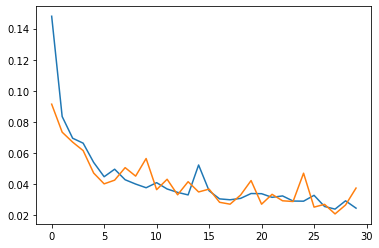

In [ ]:
plt.plot(history_comp.history['loss'])
plt.plot(history_comp.history['val_loss'])


print("loss:- ", history_comp.history['loss'])
print("val loss:- ", history_comp.history['val_loss'])

In [ ]:
comp_model = tf.keras.models.load_model('/content/drive/My Drive/Bhargav/Pre-trained/comp_model_4x_1_good.h5')

In [ ]:
 validate_data_comp = model.predict(validation_data_arr)

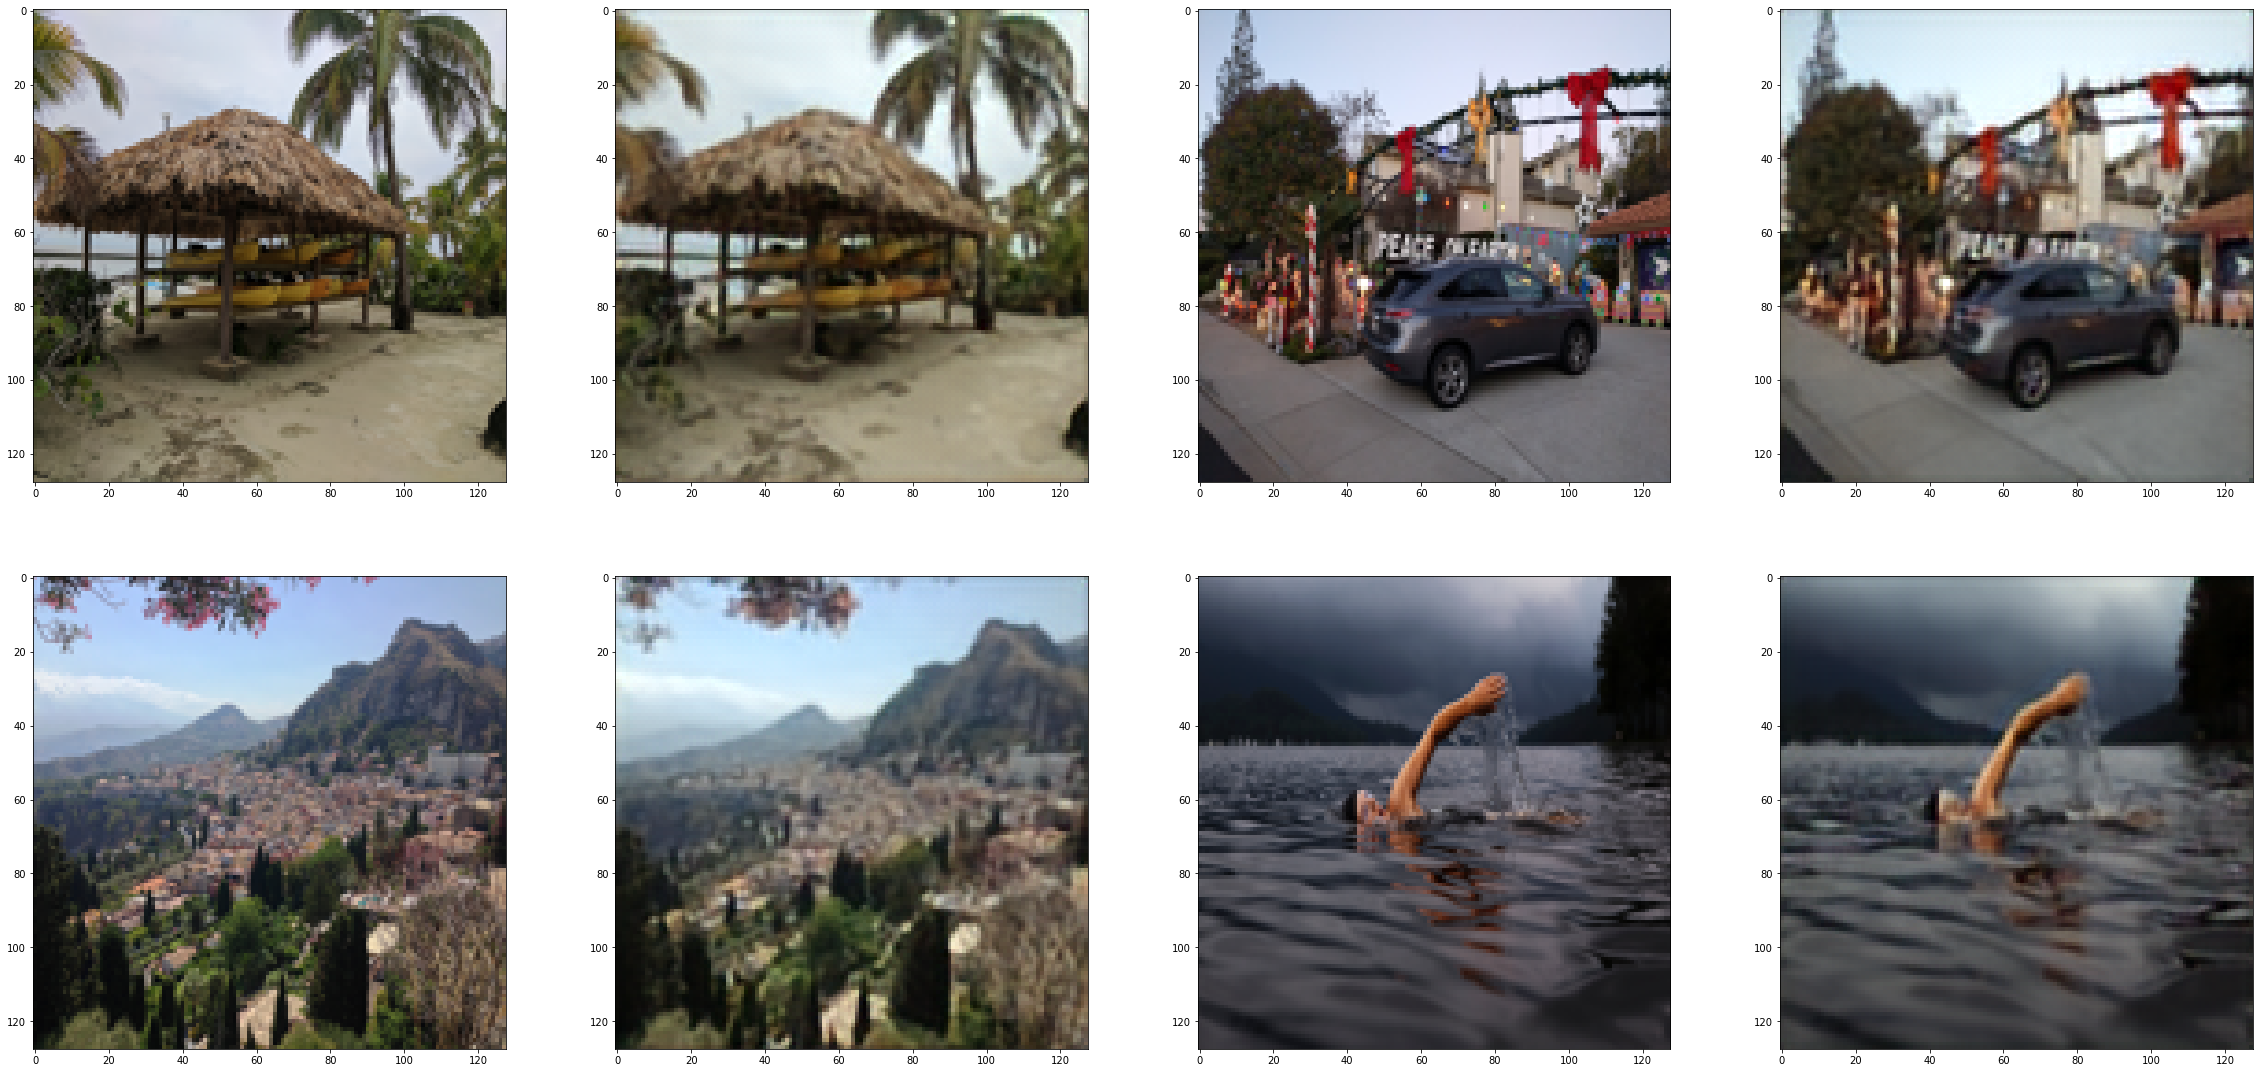

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(40,40))
k=10
i=0
for _ in range(4):
  plt.subplot(4,4, i+1)
  plt.imshow(validation_data_arr[k])
  plt.subplot(4,4,i+2)
  plt.imshow(validate_data_comp[k])
  i=i+2
  k=k+1

In [ ]:
model.save('/content/drive/My Drive/Bhargav/Pre-trained/comp_model_4x_1_good.h5')

In [ ]:
validation_data_arr = 0

In [ ]:
#pred_test = comp_model.predict(test_data_arr)

In [ ]:
train_data_comp = model.predict(train_data_arr)

In [ ]:
#train_data_arr = 0

# supe-coder model

In [ ]:
from tensorflow.keras.layers import Conv2D, Input, Dense, Reshape, Conv2DTranspose,Activation, BatchNormalization, ReLU, Concatenate
def conv_operation(x, filters, kernel_size, strides=2):
   x = Conv2D(filters=filters,
              kernel_size=kernel_size,
              strides=strides,
              padding='same')(x)
   #x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

def conv_transpose_operation(x, filters, kernel_size):
   x = Conv2DTranspose(filters=filters,
                       kernel_size=kernel_size,
                       strides=2,
                       padding='same')(x)
   #x = BatchNormalization()(x)
   x = ReLU()(x)
   return x

def deblurring_autoencoder():
   dae_inputs = Input(shape=(128,128,3), name='dae_input')
   conv_block1 = conv_operation(dae_inputs, 64, 3)
   conv_block2 = conv_operation(conv_block1, 128, 3)

   conv_block3 = conv_operation(conv_block2, 256, 3)
   #conv_block4 = conv_operation(conv_block3, 512, 3)
   
   #conv_block5 = conv_operation(conv_block4, 512, 3, 1)

   #deconv_block1 = conv_transpose_operation(conv_block5, 512,3)
   #merge1 = Concatenate()([conv_block3,deconv_block1])
   deconv_block2 = conv_transpose_operation(conv_block3, 256, 3)

   merge2 = Concatenate()([deconv_block2, conv_block2])
   deconv_block3 = conv_transpose_operation(merge2, 128, 3)
   merge3 = Concatenate()([deconv_block3, conv_block1])
   #e_conv = conv_operation(merge3, 128, 3)
   e_deconv = conv_transpose_operation(merge3, 128, 3)
   deconv_block4 = conv_transpose_operation(e_deconv, 64, 3)

   final_conv = Conv2D(filters=3, kernel_size=3,padding='same', strides=2)(deconv_block4)
   final_out = ReLU()(final_conv)

#    dae_outputs = Activation('sigmoid', name='dae_output')(final_deconv)
   
   return Model(dae_inputs, final_out, name='dae')

In [ ]:
sr_model = deblurring_autoencoder()

In [ ]:
sr_model.summary()

Model: "dae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
dae_input (InputLayer)          [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 64)   1792        dae_input[0][0]                  
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 64, 64, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 128)  73856       re_lu[0][0]                      
________________________________________________________________________________________________

In [ ]:
sr_model.compile(optimizer='adam', loss='mse')
history_sr = sr_model.fit(train_data_comp, train_data_arr, epochs=40, batch_size=64, validation_data=(validate_data_comp, validation_data_arr))

Epoch 1/40
26/26 [==============================] - 46s 2s/step - loss: 0.0474 - val_loss: 0.0119
Epoch 2/40
26/26 [==============================] - 37s 1s/step - loss: 0.0070 - val_loss: 0.0039
Epoch 3/40
26/26 [==============================] - 37s 1s/step - loss: 0.0030 - val_loss: 0.0025
Epoch 4/40
26/26 [==============================] - 37s 1s/step - loss: 0.0022 - val_loss: 0.0019
Epoch 5/40
26/26 [==============================] - 37s 1s/step - loss: 0.0018 - val_loss: 0.0015
Epoch 6/40
26/26 [==============================] - 37s 1s/step - loss: 0.0014 - val_loss: 0.0015
Epoch 7/40
26/26 [==============================] - 37s 1s/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/40
26/26 [==============================] - 37s 1s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/40
26/26 [==============================] - 37s 1s/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/40
26/26 [==============================] - 37s 1s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 11/40
26/26 [

In [ ]:
#sr_model.save('/content/drive/My Drive/Bhargav/Pre-trained/SR_model_100_epoch_4x_1_good.h5')

loss:-  [0.047354087233543396, 0.007029914762824774, 0.00298784370534122, 0.0022192136384546757, 0.001764405518770218, 0.0014419875806197524, 0.001311130472458899, 0.001198176178149879, 0.0011819932842627168, 0.0011436468921601772, 0.001132332836277783, 0.0011101565323770046, 0.0011111039202660322, 0.0010731479851529002, 0.0010631487239152193, 0.0010502127697691321, 0.0010406201472505927, 0.001048404024913907, 0.0010638226522132754, 0.0010193797061219811, 0.001012882450595498, 0.0010137927019968629, 0.00100387679412961, 0.0010045233648270369, 0.0009846313623711467, 0.00102146714925766, 0.0010262588039040565, 0.0010078612249344587, 0.000985238584689796, 0.0009762781555764377, 0.0009676654008217156, 0.0009712675819173455, 0.0009715010528452694, 0.0009785911533981562, 0.0009641905198805034, 0.0009472855017520487, 0.0009691384038887918, 0.000993569497950375, 0.0009454054525122046, 0.0009352123597636819]
val loss:-  [0.011942262761294842, 0.003911531064659357, 0.002523178467527032, 0.001941

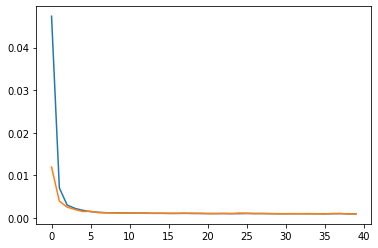

In [ ]:
plt.plot(history_sr.history['loss'])
plt.plot(history_sr.history['val_loss'])
#plt.ylim([0, 0.3])

print("loss:- ", history_sr.history['loss'])
print("val loss:- ", history_sr.history['val_loss'])

#Pre trained import

In [ ]:
model.save("/content/drive/MyDrive/Bhargav/Pre-trained/Ultimate_final/comp_model_4x_final.h5")
sr_model.save("/content/drive/MyDrive/Bhargav/Pre-trained/Ultimate_final/SR_model_final.h5")

model.save("/content/drive/MyDrive/Bhargav/Pre-trained/Ultimate_final/comp_model_4x_final.pb")
sr_model.save("/content/drive/MyDrive/Bhargav/Pre-trained/Ultimate_final/SR_model_final.pb")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhargav/Pre-trained/Ultimate_final/comp_model_4x_final.pb/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhargav/Pre-trained/Ultimate_final/comp_model_4x_final.pb/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhargav/Pre-trained/Ultimate_final/SR_model_final.pb/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bhargav/Pre-trained/Ultimate_final/SR_model_final.pb/assets


In [ ]:
comp_model = tf.keras.models.load_model('/content/drive/MyDrive/Bhargav/Pre-trained/Ultimate_final/comp_model_4x_final.h5')
sr_model = tf.keras.models.load_model('/content/drive/MyDrive/Bhargav/Pre-trained/Ultimate_final/SR_model_final.h5')

In [ ]:
test_data_comp = comp_model.predict(test_data_arr)

In [ ]:
sr_test_data = sr_model.predict(test_data_comp)

In [ ]:
#sr_pred_train = sr_model.predict(pred_train)

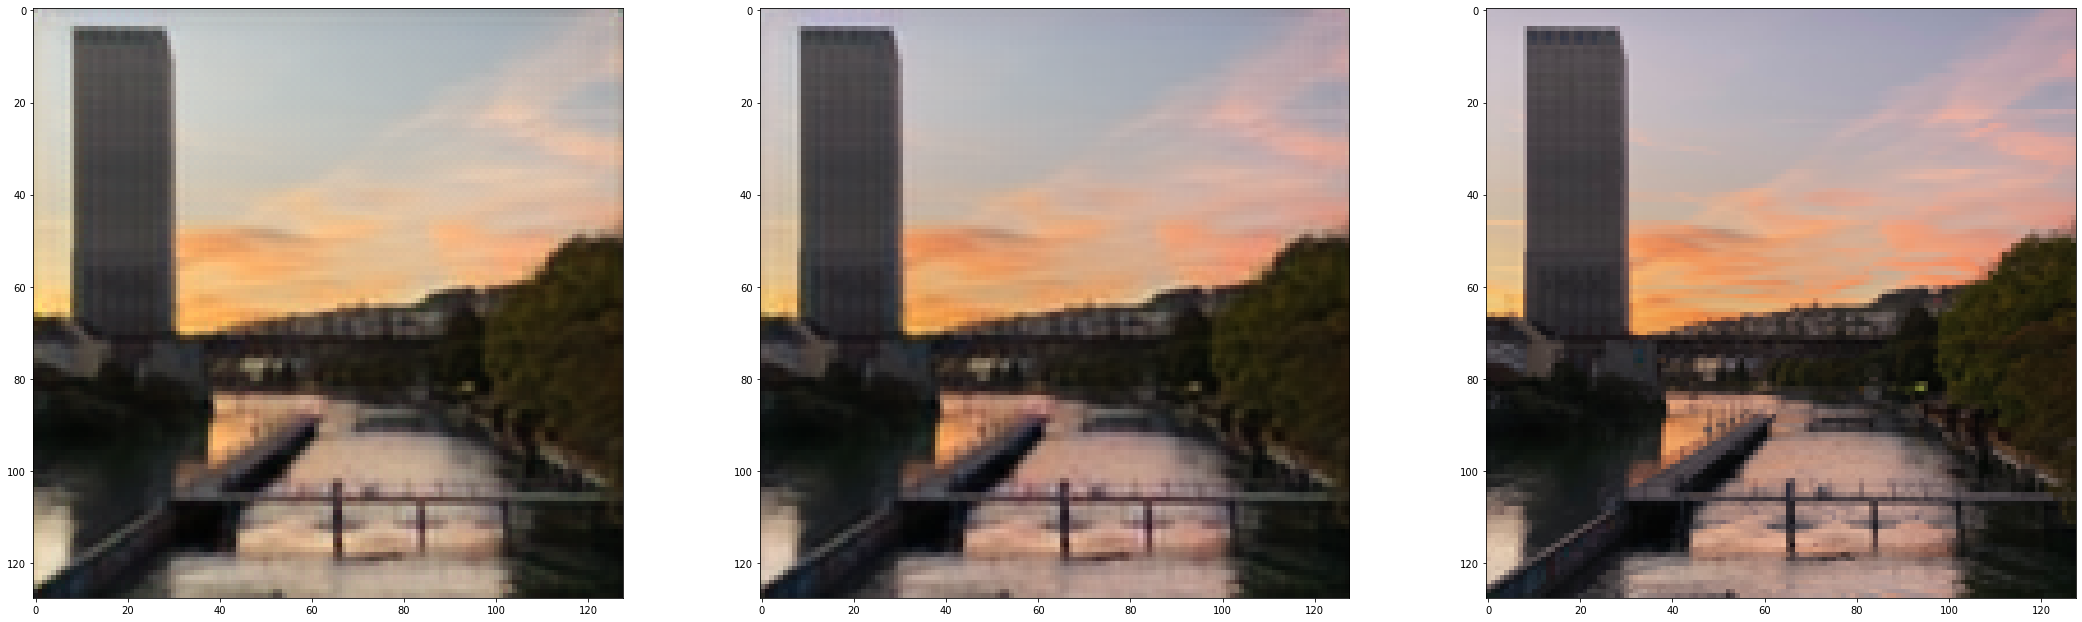

In [ ]:
image_index = 4
plt.figure(figsize=(128, 128))
i = 1
ax = plt.subplot(10, 10, i)
plt.imshow(test_data_comp[image_index])
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(sr_test_data[image_index])
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(test_data_arr[image_index])
plt.show()

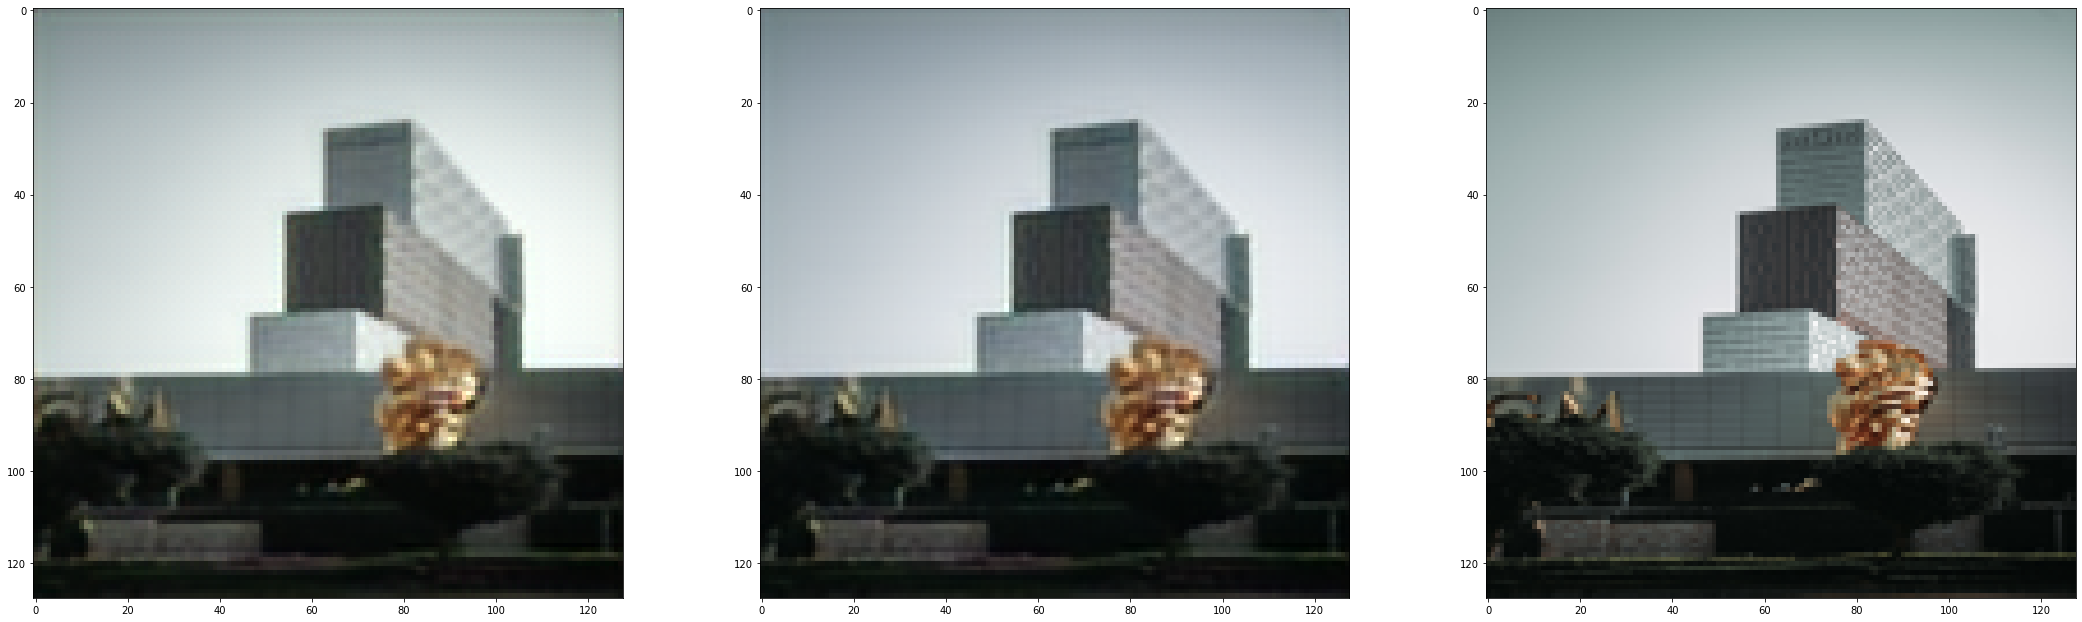

In [ ]:
image_index = 22
plt.figure(figsize=(128, 128))
i = 1
ax = plt.subplot(10, 10, i)
plt.imshow(test_data_comp[image_index])
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(sr_test_data[image_index])
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(test_data_arr[image_index])
plt.show()

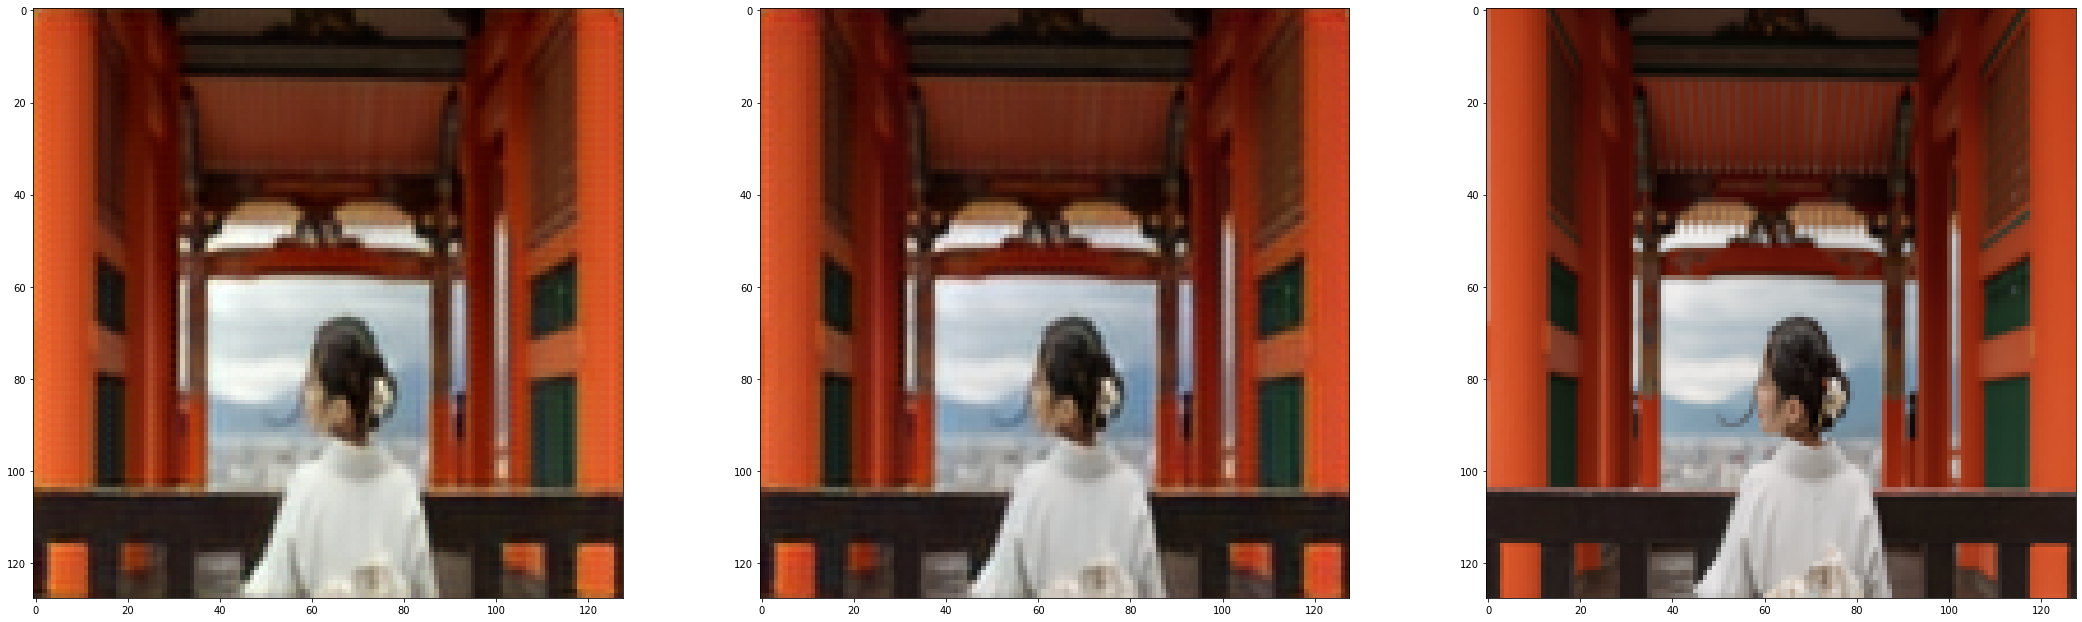

In [ ]:
image_index = 27
plt.figure(figsize=(128, 128))
i = 1
ax = plt.subplot(10, 10, i)
plt.imshow(test_data_comp[image_index])
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(sr_test_data[image_index])
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(test_data_arr[image_index])
plt.show()

In [ ]:
idx=22
orig_image = Image.fromarray(np.uint8(test_data_arr[idx]*255)).convert('RGB')
comp_image = Image.fromarray(np.uint8(test_data_comp[idx]*255)).convert('RGB')
sr_image = Image.fromarray(np.uint8(sr_test_data[idx]*255)).convert('RGB')

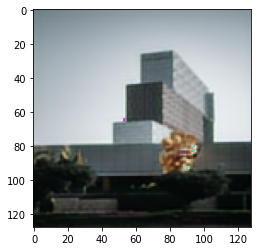

In [ ]:
plt.imshow(sr_image)

In [ ]:
tf.image.psnr(np.uint8(test_data_arr[idx]*255), np.uint8(test_data_comp[idx]*255), max_val=255)

<tf.Tensor: shape=(), dtype=float32, numpy=25.184021>

In [ ]:
tf.image.psnr(np.uint8(test_data_arr[idx]*255), np.uint8(sr_test_data[idx]*255), max_val=255)

<tf.Tensor: shape=(), dtype=float32, numpy=32.421062>

In [ ]:
tf.image.ssim(np.uint8(test_data_arr[9]*255), np.uint8(test_data_comp[9]*255), max_val=255)

<tf.Tensor: shape=(), dtype=float32, numpy=0.93741256>

In [ ]:
tf.image.ssim(np.uint8(test_data_arr[9]*255), np.uint8(sr_test_data[9]*255), max_val=255)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9583356>

In [ ]:
PIL_image.save('comp_test_3_128.jpg')

In [ ]:
plt.imshow()

In [ ]:
model.evaluate(test_data_arr, test_data_arr)

14/14 [==============================] - 2s 144ms/step - loss: 0.0387


0.03870757296681404

In [ ]:
test_comp = model.predict(test_data_arr)

In [ ]:
sr_model.evaluate(test_comp, test_data_arr)

14/14 [==============================] - 4s 275ms/step - loss: 9.5744e-04


0.0009574398281984031

## Visualize

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='comp_model_plot.png', show_shapes=True, show_layer_names=True, show_dtype=True, dpi=200)

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(sr_model, to_file='comp_model_plot.png', show_shapes=True, show_layer_names=True, show_dtype=True, dpi=200)

## Plots

In [ ]:
sr_loss= [0.047354087233543396, 0.007029914762824774, 0.00298784370534122, 0.0022192136384546757, 0.001764405518770218, 0.0014419875806197524, 0.001311130472458899, 0.001198176178149879, 0.0011819932842627168, 0.0011436468921601772, 0.001132332836277783, 0.0011101565323770046, 0.0011111039202660322, 0.0010731479851529002, 0.0010631487239152193, 0.0010502127697691321, 0.0010406201472505927, 0.001048404024913907, 0.0010638226522132754, 0.0010193797061219811, 0.001012882450595498, 0.0010137927019968629, 0.00100387679412961, 0.0010045233648270369, 0.0009846313623711467, 0.00102146714925766, 0.0010262588039040565, 0.0010078612249344587, 0.000985238584689796, 0.0009762781555764377, 0.0009676654008217156, 0.0009712675819173455, 0.0009715010528452694, 0.0009785911533981562, 0.0009641905198805034, 0.0009472855017520487, 0.0009691384038887918, 0.000993569497950375, 0.0009454054525122046, 0.0009352123597636819]
sr_val_loss= [0.011942262761294842, 0.003911531064659357, 0.002523178467527032, 0.0019416117575019598, 0.0014830471482127905, 0.001545971492305398, 0.001203299150802195, 0.0011867049615830183, 0.001142833847552538, 0.0011049540480598807, 0.0011195706902071834, 0.001085023395717144, 0.001084046089090407, 0.0010427928064018488, 0.001071270788088441, 0.001031005522236228, 0.0010427350644022226, 0.001093444530852139, 0.0009996244916692376, 0.001059881062246859, 0.0009820184204727411, 0.0009742139372974634, 0.001043035532347858, 0.0009624648373574018, 0.0011111944913864136, 0.0010709159541875124, 0.0009573220158927143, 0.0010157667566090822, 0.0009822675492614508, 0.0009527758811600506, 0.0009417958208359778, 0.0009606749517843127, 0.0009636292234063148, 0.0009331858018413186, 0.0009445599862374365, 0.0009336475050076842, 0.0010054518934339285, 0.0010069288546219468, 0.0009196079336106777, 0.0009282983955927193]

comp_loss= [0.14798671007156372, 0.08335288614034653, 0.06936278939247131, 0.06617741286754608, 0.05379806086421013, 0.044545117765665054, 0.04939709231257439, 0.04260138422250748, 0.039825472980737686, 0.03744969144463539, 0.04072465002536774, 0.036655131727457047, 0.034461893141269684, 0.03283156827092171, 0.052109502255916595, 0.03548037260770798, 0.030268171802163124, 0.02970055490732193, 0.030595382675528526, 0.03372957184910774, 0.03361747786402702, 0.03127218410372734, 0.032175518572330475, 0.02888096123933792, 0.02878701128065586, 0.03256135806441307, 0.025371696799993515, 0.02368190698325634, 0.029018191620707512, 0.024293914437294006]
comp_val_loss= [0.09131473302841187, 0.0732681006193161, 0.06684338301420212, 0.061393626034259796, 0.046932805329561234, 0.039954762905836105, 0.04233745113015175, 0.05040857568383217, 0.04494713246822357, 0.056280288845300674, 0.03621562570333481, 0.0429176464676857, 0.032903388142585754, 0.041341520845890045, 0.03473319858312607, 0.0365682952105999, 0.02807023748755455, 0.026859797537326813, 0.03272978961467743, 0.042083170264959335, 0.02684311382472515, 0.033207762986421585, 0.029046548530459404, 0.028578996658325195, 0.04682685434818268, 0.0249523613601923, 0.026753854006528854, 0.020580464974045753, 0.026330793276429176, 0.037235286086797714]


In [ ]:
plt.style.use('seaborn-darkgrid')

In [ ]:
epoch_comp=np.linspace(1,30,30)
sr_epoch = np.linspace(1,40,40)

In [ ]:
from scipy.ndimage.filters import gaussian_filter1d



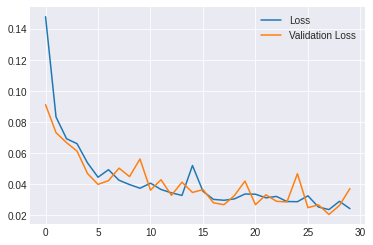

In [ ]:
plt.plot(comp_loss)
plt.plot(comp_val_loss)
plt.legend(["Loss", "Validation Loss"])

In [ ]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

In [ ]:
comp_loss_s = gaussian_filter1d(comp_loss, sigma=5)

comp_val_loss_s = gaussian_filter1d(comp_val_loss, sigma=3)

(0.02, 0.1)

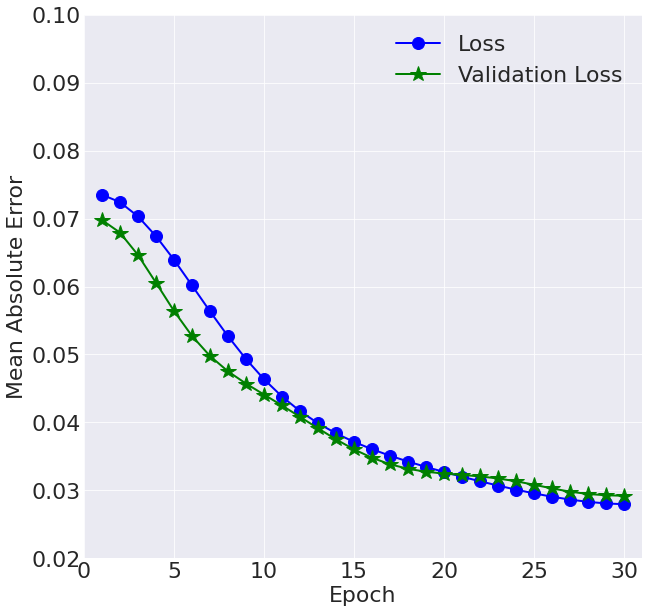

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(epoch_comp, comp_loss_s, color='blue', marker='o', linewidth=2, markersize=12)
plt.plot(epoch_comp, comp_val_loss_s, color='green', marker='*', linewidth=2, markersize=16)
plt.legend(["Loss", "Validation Loss"])
plt.xlabel('Epoch')
plt.ylabel("Mean Absolute Error")
plt.xlim([0, 31])
plt.ylim([0.02, 0.1])

([<matplotlib.axis.YTick at 0x7f5ff57855d0>,
 <a list of 11 Text major ticklabel objects>)

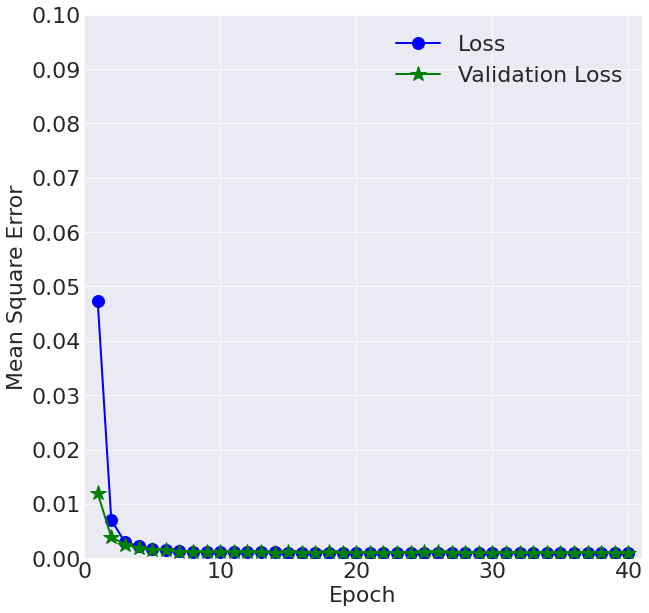

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(sr_epoch, sr_loss, color='blue', marker='o', linewidth=2, markersize=12)
plt.plot(sr_epoch, sr_val_loss, color='green', marker='*', linewidth=2, markersize=16)
plt.legend(["Loss", "Validation Loss"])
plt.xlabel('Epoch')
plt.ylabel("Mean Square Error")
plt.xlim([0, 41])
plt.ylim([0, 0.1])
plt.yticks([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])